# A23 ESTIMATING WITH DAGS

## SET UP

In [1]:
# Interactive magics
%matplotlib inline
%qtconsole --colors=linux

In [2]:
#scientific packages
import pandas as pd
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import norm
import math
import patsy as pt
import statsmodels as sm
from statsmodels.discrete.discrete_model import Logit
from sklearn.neighbors import KNeighborsRegressor
from scipy.stats import chisquare,f_oneway

In [3]:
sns.set(style="darkgrid", palette="muted")
plt.rcParams['figure.figsize'] = 12, 4

In [4]:
data = pd.read_csv("C:/Users/RISHAV/Downloads/fake-smoke.csv")

In [5]:
data.head(30)

Unnamed: 0  cancer  cellular       tar     teeth  dental   smoking  \
0            1       0  0.397840  0.056957  0.335671       1  0.000000   
1            2       0  0.341734  0.037457  0.335651       1  0.000000   
2            3       1  6.793615  0.323030  0.150112       1  3.444111   
3            4       0  0.428134  0.044880  0.330618       1  0.000000   
4            5       0  0.435634  0.059584  0.335365       1  0.000000   
5            6       0  0.544660  0.068532  0.450002       0  0.000000   
6            7       1  6.759078  0.333597  0.149010       1  3.493789   
7            8       1  0.780588  0.101520  0.293885       1  0.625888   
8            9       1  6.882838  0.329757  0.536634       0  3.573345   
9           10       0  0.656702  0.081672  0.282735       1  0.706237   
10          11       0  0.294495  0.041204  0.334805       1  0.000000   
11          12       0  0.352509  0.039676  0.333354       1  0.000000   
12          13       0  0.414167  0.046766  0.332165       1  0.000000   
13          14       0  0.395949  0.056754  0.331847       1  0.000000   
14          15       0  0.311046  0.046336  0.332036       1  0.000000   
15          16       0  0.360079  0.057760  0.334911       1  0.000000   
16          17       0  0.788636  0.104716  0.290196       1  0.600068   
17          18       0  0.465942  0.043416  0.330224       1  0.000000   
18          19       0  0.450846  0.059055  0.329951       1  0.000000   
19          20       1  6.867953  0.333680  0.147587       1  3.490552   
20          21       0  0.360140  0.046916  0.333834       1  0.000000   
21          22       0  0.316856  0.035828  0.334694       1  0.000000   
22          23       0  0.312711  0.043588  0.329410       1  0.000000   
23          24       1  6.882824  0.342719  0.146462       1  3.544695   
24          25       0  0.280827  0.040597  0.331048       1  0.000000   
25          26       0  0.491141  0.070080  0.332403       1  0.000000   
26          27       1  6.916746  0.336120  0.538732       0  3.524655   
27          28       0  0.317083  0.027405  0.334622       1  0.000000   
28          29       0  0.315517  0.050583  0.332624       1  0.000000   
29          30       0  0.364641  0.045514  0.328476       1  0.000000   

     asbestos  occupation  
0    2.811089           7  
1    2.136719           6  
2   97.485057           1  
3    2.655931           6  
4    3.106472           6  
5    2.324665           5  
6   96.836741           1  
7    2.792083           4  
8   97.140341           1  
9    2.013693           4  
10   2.000245           7  
11   2.295794           6  
12   1.905929           6  
13   2.942274           5  
14   2.127393           5  
15   1.432350           5  
16   2.887095           4  
17   2.753800           5  
18   2.273724           5  
19  97.162028           1  
20   1.106093           5  
21   2.168199           5  
22   2.018450           5  
23  97.101827           1  
24   1.715117           6  
25   2.146158           5  
26  96.830044           1  
27   2.727133           6  
28   1.953452           5  
29   1.508230           5

(array([427.,  43.,   5.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,  13.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0., 113.]),
 array([ 0.72043489,  3.9799872 ,  7.23953951, 10.49909183, 13.75864414,
        17.01819645, 20.27774876, 23.53730108, 26.79685339, 30.0564057 ,
        33.31595801, 36.57551033, 39.83506264, 43.09461495, 46.35416726,
        49.61371958, 52.87327189, 56.1328242 , 59.39237651, 62.65192883,
        65.91148114, 69.17103345, 72.43058576, 75.69013808, 78.94969039,
        82.2092427 , 85.46879501, 88.72834733, 91.98789964, 95.24745195,
        98.50700426]),
 <a list of 30 Patch objects>)

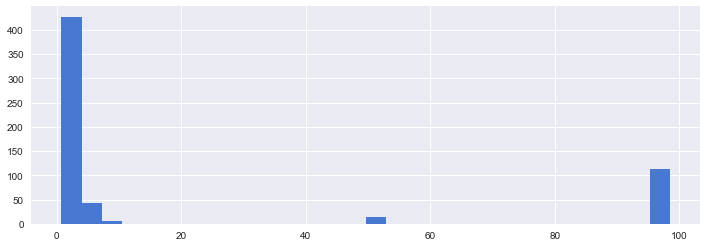

In [23]:
plt.hist(data['asbestos'],bins = 30)

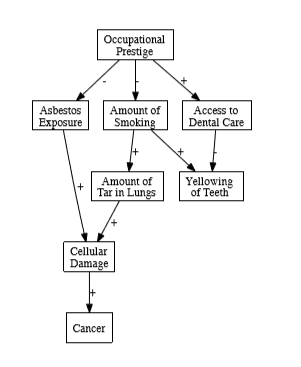

### ***Using conditional independence to specify regressions***

the conditional risk of acquiring cancer given smoking can be estimated if we can control for confounders. First and foremost, the confounders need to be identified. Implementing **backdoor adjustment** strategy on the aforedepicted causal graph yields the confounders as ***occupational prestige*** and ***Asbestos exposure***

using the data ***fake-smoke.csv*** a logistic regression model is fit to determine the risk of cancer given the amount of smoking controlling for appropriate covariates

### Fitting a logistic regression model with appropriate covariates

In [6]:
covariates = ['occupation','asbestos','intercept','smoking']
data['intercept'] = np.ones((len(data),))
output = ['cancer']
clf = Logit(data[output],data[covariates])
results = clf.fit()
results.summary()

Optimization terminated successfully.
         Current function value: 0.281258
         Iterations 7


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                 cancer   No. Observations:                  601
Model:                          Logit   Df Residuals:                      597
Method:                           MLE   Df Model:                            3
Date:                Tue, 10 Jul 2018   Pseudo R-squ.:                  0.5266
Time:                        19:05:39   Log-Likelihood:                -169.04
converged:                       True   LL-Null:                       -357.04
                                        LLR p-value:                 3.471e-81
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
occupation    -0.0663      0.273     -0.243      0.808      -0.602       0.469
asbestos       0.0518      0.010      5.419      0.000       0.033       0.071
intercept     -2.1408      1.466     -1.461      0.144      -5.013       0.732
smoking        0.3015      0.312      0.965      0.334      -0.311       0.914
==============================================================================
"""

### fitting logistic regression with all covariates

In [7]:
covariates = ['cellular','tar','teeth',
              'dental','occupation','asbestos','intercept','smoking']
data['intercept'] = np.ones((len(data),))
output = ['cancer']
clf = Logit(data[output],data[covariates])
results = clf.fit()
results.summary()

Optimization terminated successfully.
         Current function value: 0.278102
         Iterations 8


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                 cancer   No. Observations:                  601
Model:                          Logit   Df Residuals:                      593
Method:                           MLE   Df Model:                            7
Date:                Tue, 10 Jul 2018   Pseudo R-squ.:                  0.5319
Time:                        19:05:39   Log-Likelihood:                -167.14
converged:                       True   LL-Null:                       -357.04
                                        LLR p-value:                 5.085e-78
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
cellular      -2.2893      3.034     -0.754      0.451      -8.237       3.658
tar           24.0118     23.387      1.027      0.305     -21.827      69.850
teeth          9.8755      7.421      1.331      0.183      -4.670      24.421
dental         2.3565      2.245      1.050      0.294      -2.043       6.756
occupation    -0.1165      0.283     -0.411      0.681      -0.672       0.439
asbestos       0.1604      0.153      1.051      0.293      -0.139       0.459
intercept     -7.9977      4.665     -1.715      0.086     -17.140       1.145
smoking       -0.0484      1.239     -0.039      0.969      -2.476       2.379
==============================================================================
"""

In [8]:
!pip install pgmpy

distributed 1.21.8 requires msgpack, which is not installed.


In [9]:
from pgmpy.models import BayesianModel
cancer_model = BayesianModel([('occupation','smoking'),
                            ('occupation','dental'),
                            ('occupation','asbestos'),
                            ('smoking','tar'),
                            ('smoking','teeth'),
                            ('dental','teeth'),
                            ('tar','cellular'),
                            ('asbestos','cellular'),
                            ('cellular','cancer')])

In [19]:
cancer_model.local_independencies('smoking')

(smoking _|_ tar, teeth, cellular, dental, cancer, asbestos | occupation)

In [18]:
cancer_model.active_trail_nodes('smoking',observed = ['asbestos','occupation'])

{'smoking': {'cancer', 'cellular', 'smoking', 'tar', 'teeth'}}